# Exploratory data analysis

This file is made to perform EDA (Exploratory Data Analysis) on the dataset contained in `created_dataset.pkl`, generated by the execution of the whole `dataset_creation.ipynb`

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
# Loading the dataframe
df = pd.read_pickle("created_dataset.pkl")

In [229]:
# Display data
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid", palette="muted")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7321 entries, 0 to 7320
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             7321 non-null   object        
 1   hour             7321 non-null   int32         
 2   traffic_z0       7321 non-null   float64       
 3   traffic_z1       7321 non-null   float64       
 4   traffic_z3       7321 non-null   float64       
 5   traffic_z4       7321 non-null   float64       
 6   traffic_z5       7321 non-null   float64       
 7   traffic_z6       7321 non-null   float64       
 8   traffic_z7       7321 non-null   float64       
 9   traffic_z8       7321 non-null   float64       
 10  datetime_hour_x  7321 non-null   datetime64[ns]
 11  station_4        7321 non-null   float64       
 12  station_43       7321 non-null   float64       
 13  station_44       7321 non-null   float64       
 14  station_54       7321 non-null   float64

,date,hour,traffic_z0,traffic_z1,traffic_z3,traffic_z4,traffic_z5,traffic_z6,traffic_z7,traffic_z8,datetime_hour_x,station_4,station_43,station_44,station_54,station_57,station_58,datetime_hour_y,datetime_hour,temperature,precipitation,humidity,pressure,cloud_cover,is_raining,wind_u,wind_v
0,2024-01-01,0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2024-01-01 00:00:00,34.0,43.0,33.0,23.0,16.0,14.0,2024-01-01 01:00:00,2024-01-01 00:00:00,5.6,0.0,87,1015.0,100,0,-3.230844,2.524212
1,2024-01-01,1,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2024-01-01 01:00:00,34.0,43.0,33.0,23.0,16.0,14.0,2024-01-01 01:00:00,2024-01-01 01:00:00,5.4,0.0,92,1015.0,100,0,-6.188619,5.379684
2,2024-01-01,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2024-01-01 02:00:00,34.0,36.0,29.0,26.0,25.0,18.0,2024-01-01 02:00:00,2024-01-01 02:00:00,5.6,0.0,90,1015.3,100,0,-5.043269,3.940233
3,2024-01-01,3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2024-01-01 03:00:00,34.0,30.0,32.0,18.0,21.0,14.0,2024-01-01 03:00:00,2024-01-01 03:00:00,5.9,0.0,84,1015.2,100,0,-5.400154,3.244740
4,2024-01-01,4,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2024-01-01 04:00:00,27.0,34.0,26.0,14.0,16.0,15.0,2024-01-01 04:00:00,2024-01-01 04:00:00,6.3,0.0,77,1014.9,100,0,-6.138531,1.417192


If you made no change to the `dataset_creation.ipynb` notebook, `created_dataset.pkl` will only contain data from 5 stations ou of the 8 available. This is normal, and due to the fact that the remaining 3 do not measure PM10 (default pollutant examined).

We start by checking the basic structure of the dataset: number of entries, column types, and if there are any missing values.
The dataset includes traffic indicators for multiple zones (traffic_zN), pollution levels from several monitoring stations, and meteorological data such as temperature, humidity, and wind.
The data was already cleaned during the creation process in `dataset_creation.ipynb`, but we can double check:

In [230]:
# Check missing values
df.isna().sum()

date               0
hour               0
traffic_z0         0
traffic_z1         0
traffic_z3         0
traffic_z4         0
traffic_z5         0
traffic_z6         0
traffic_z7         0
traffic_z8         0
datetime_hour_x    0
station_4          0
station_43         0
station_44         0
station_54         0
station_57         0
station_58         0
datetime_hour_y    0
datetime_hour      0
temperature        0
precipitation      0
humidity           0
pressure           0
cloud_cover        0
is_raining         0
wind_u             0
wind_v             0
dtype: int64

We can see here that columns have zero missing values, as expected. We can also recheck that data is continuous in time:

2024-01-01 00:00:00 2024-11-01 00:00:00


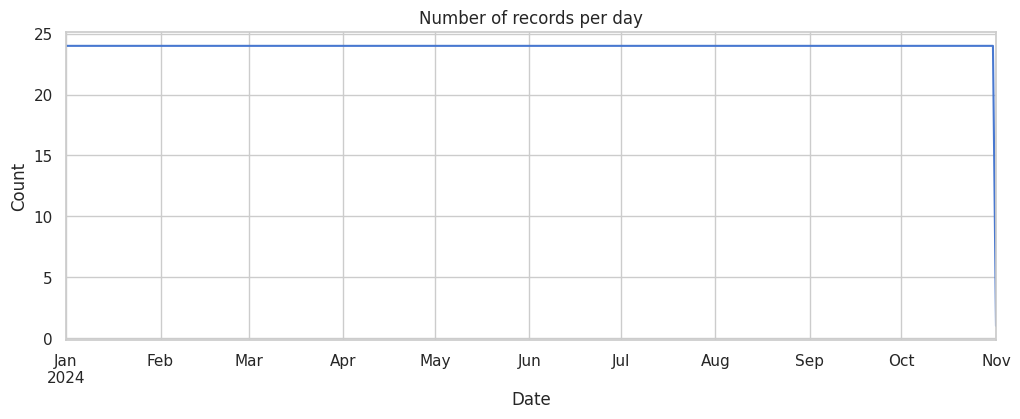

In [231]:
# Check date range
print(df['datetime_hour'].min(), df['datetime_hour'].max())

# Plot number of entries per day
df['date'] = pd.to_datetime(df['date'])
daily_counts = df.groupby('date').size()
daily_counts.plot(figsize=(12,4), title="Number of records per day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

The expected output is a constant function equal to 24 (hours in a day). If the last day shows 0, it is normal.

## Traffic intensity overview

,count,mean,std,min,25%,50%,75%,max
traffic_z0,7321.0,2.543942,0.644738,1.0,2.00,2.05,3.0,5.00
traffic_z1,7321.0,2.122941,0.709783,1.0,2.00,2.00,3.0,6.00
traffic_z3,7321.0,2.226376,0.888269,1.0,2.00,2.00,3.0,6.00
traffic_z4,7321.0,2.694960,1.145089,1.0,2.00,2.00,3.0,6.00
traffic_z5,7321.0,2.483629,0.577984,1.0,2.00,2.00,3.0,6.00
traffic_z6,7321.0,2.820373,1.471159,1.0,1.10,2.65,4.0,5.00
traffic_z7,7321.0,1.967081,0.687549,1.0,1.75,2.00,2.0,4.25
traffic_z8,7321.0,1.960081,0.693673,1.0,1.35,2.00,2.0,6.00


/tmp/ipykernel_6408/4248014857.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_means.index, y=traffic_means.values, palette="viridis")


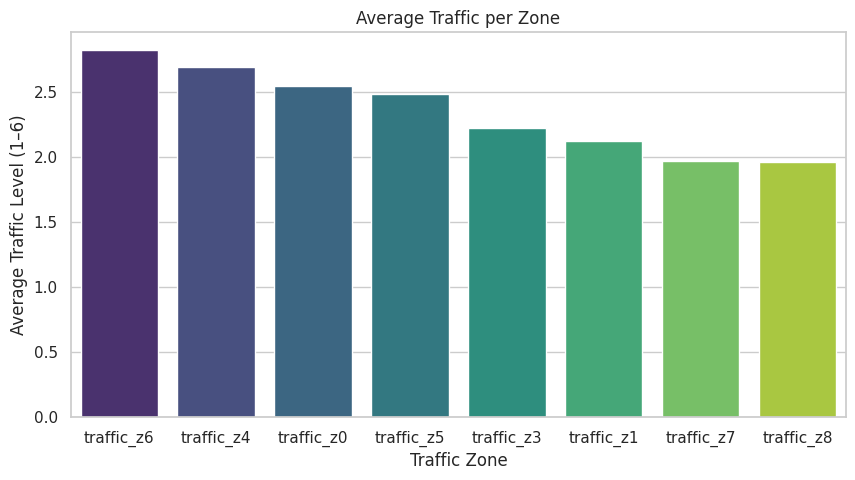

In [232]:
traffic_cols = [col for col in df.columns if 'traffic_z' in col]

# Summary statistics
display(df[traffic_cols].describe().T)  # Transposed for readability



# Means per zone
traffic_means = df[traffic_cols].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=traffic_means.index, y=traffic_means.values, palette="viridis")
plt.title('Average Traffic per Zone')
plt.ylabel('Average Traffic Level (1–6)')
plt.xlabel('Traffic Zone')
plt.show()

Traffic levels are scaled from 1 to 6, where higher values mean more congestion.
Means are close to 2–3, it indicates moderate traffic on average.

## Pollution levels

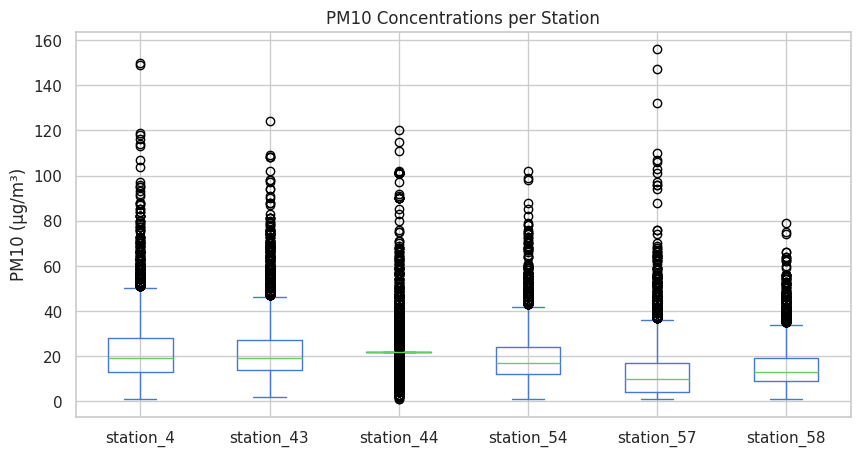

In [233]:
pollution_cols = [col for col in df.columns if "station_" in col]
df[pollution_cols].describe()

# Plot
df[pollution_cols].plot(kind='box', figsize=(10,5), title='PM10 Concentrations per Station')
plt.ylabel("PM10 (µg/m³)")
plt.show()

### Explanation of the previous graph (boxplot)
A boxplot’s box spans the interquartile range (IQR: Q3–Q1), capturing the central 50% of data. Whiskers extend to 1.5*IQR from the quartiles, marking the expected variability. Points that are outside are plotted individually, indicating atypical values (pollution spikes for example) relative to the bulk distribution. The "candle" thus summarizes the core data, and outliers highlight deviations.

The PM10 distributions across stations show that most concentrations stay below ~30 µg/m³, with some spikes up to 100 µg/m³ or even more.
These upper outliers likely correspond to short-term pollution episodes (for example, rush hours or dust events, or maybe a pollution source very close to the sensor).
The median PM10 values are around 15–20 µg/m³, suggesting typical air quality is moderate but occasionally poor.
This value is interesting to perform classification, as the thresholds to define good/medium/bad air quality are around this zone.


### Time evolution of pollution (smoothed)

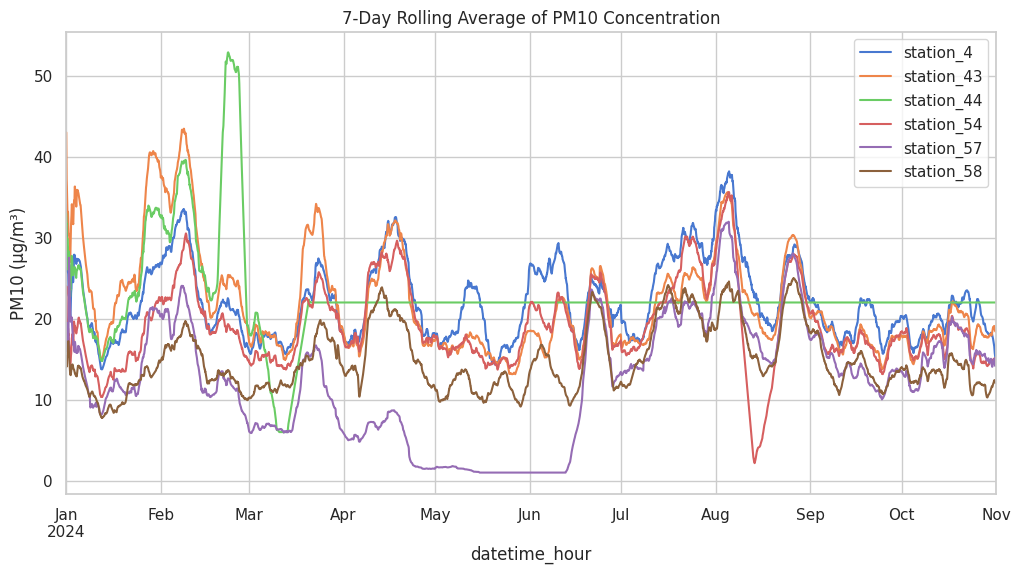

In [234]:
df.set_index('datetime_hour')[pollution_cols].rolling('7D').mean().plot(figsize=(12,6))
plt.title("7-Day Rolling Average of PM10 Concentration")
plt.ylabel("PM10 (µg/m³)")
plt.show()

This graph reveals that station_57 shows unexpected values for the period April 2024-July 2024. This is most likely due to the sensor being clogged or some similar issue.
It also appears that station 44 suffers from an outage since March-April 2024.
Given this graph, I will choose the mean of all stations but number 57 and 44 as a reference for training and an objective of prediction, as well as station_4 by itself.

In [235]:
if "station_57" in pollution_cols:
    pollution_cols.remove("station_57")
if "station_44" in pollution_cols:
    pollution_cols.remove("station_44")

print("Remaining stations: ", pollution_cols)

Remaining stations:  ['station_4', 'station_43', 'station_54', 'station_58']


### Weather patterns

,count,mean,std,min,25%,50%,75%,max
temperature,7321.0,17.705587,6.306420,-1.200000,13.100000,17.800000,22.200000,36.600000
precipitation,7321.0,0.102104,0.612085,0.000000,0.000000,0.000000,0.000000,18.100000
humidity,7321.0,74.643218,17.454187,16.000000,62.000000,77.000000,90.000000,100.000000
pressure,7321.0,1012.720503,7.415282,981.400000,1009.200000,1012.700000,1015.900000,1034.100000
cloud_cover,7321.0,49.185904,41.741666,0.000000,4.000000,42.000000,99.000000,100.000000
wind_u,7321.0,-1.716569,7.360875,-31.741735,-5.665601,-2.545584,2.197615,29.216524
wind_v,7321.0,-1.111754,7.003150,-29.872936,-5.466403,0.726385,3.632021,21.574934


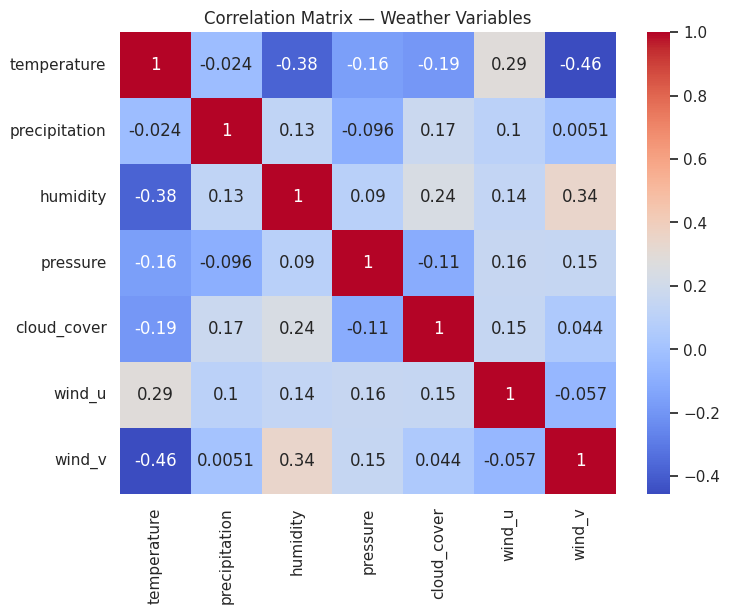

In [236]:
weather_cols = ['temperature', 'precipitation', 'humidity', 'pressure', 'cloud_cover', 'wind_u', 'wind_v']
display(df[weather_cols].describe().T)

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[weather_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix — Weather Variables")
plt.show()

We check that weather variables make sense: for isntance, temperature and humidity are negatively correlated.

### Relationships: traffic and pollution

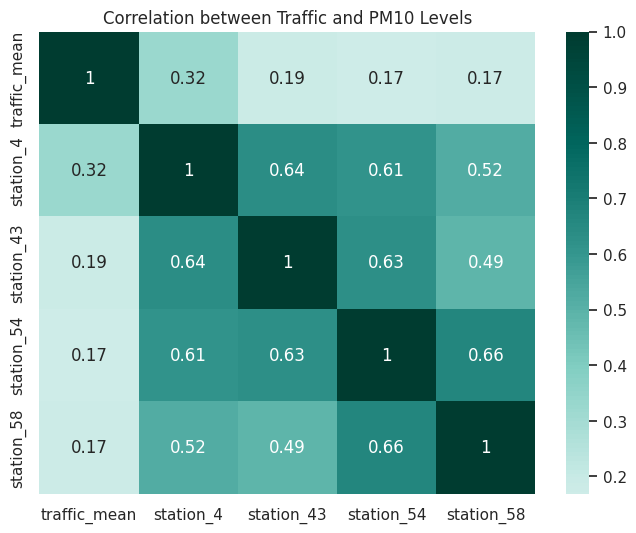

In [237]:
# Average traffic (across zones)
df['traffic_mean'] = df[traffic_cols].mean(axis=1)

# Correlation between traffic and pollution
corrs = df[['traffic_mean'] + pollution_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corrs, annot=True, cmap='BrBG', center=0)
plt.title("Correlation between Traffic and PM10 Levels")
plt.show()

We notice that all stations are strongly (and positively) correlated one with another. This was expected, as the pollution in the city follow the same patterns in all areas (see the 7 day rolling graph).
In addition, we can confirm that air quality is at least a little correlated to the traffic.

### Relationships: weather and pollution

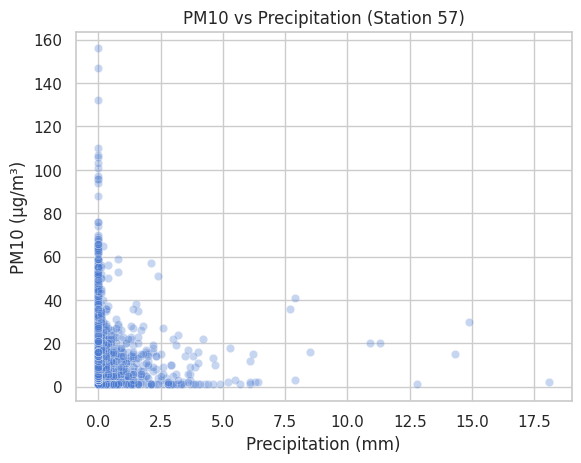

In [238]:
# Pollution vs precipitation
sns.scatterplot(x='precipitation', y='station_57', data=df, alpha=0.3)
plt.title("PM10 vs Precipitation (Station 57)")
plt.xlabel("Precipitation (mm)")
plt.ylabel("PM10 (µg/m³)")
plt.show()

Barcelona has a mean of 122 raining days per year, so it rains roughly a third of the days.
This graphs shows that the episodes with the most pollution (more than 40 µg/m^3) never occur when there is rain.

### Applying the modification to the dataset
After conducting the EDA of `created_dataset.pkl`, I determined that I should drop stations 57 and 44. Let's create and save the updated dataset that will be used for actual machine learning:

In [239]:
df = pd.read_pickle("created_dataset.pkl") # Reload the dataset because the EDA made changes to the dataset
df=df.drop(['station_57', 'station_44'], axis=1)
df.to_pickle("final_dataset.pkl")

## EDA for classification
We can perform a similar analysis for the classification dataset (same data but with labels instead of pollution values):

### Overview of air quality categories

In [240]:
df = pd.read_pickle("created_dataset_classes.pkl")


station_4 value counts (%):
station_4
good      54.0
medium    38.0
bad        8.0
Name: proportion, dtype: float64

station_43 value counts (%):
station_43
good      56.0
medium    36.0
bad        8.0
Name: proportion, dtype: float64

station_54 value counts (%):
station_54
good      61.0
medium    35.0
bad        4.0
Name: proportion, dtype: float64

station_58 value counts (%):
station_58
good      80.0
medium    18.0
bad        2.0
Name: proportion, dtype: float64


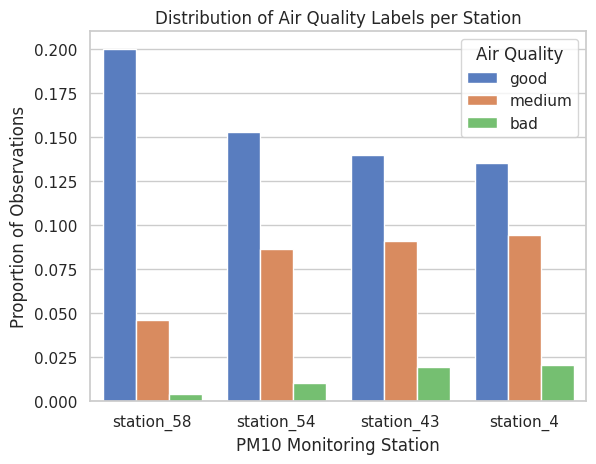

In [241]:
for col in pollution_cols:
    print(f"\n{col} value counts (%):")
    print(df[col].value_counts(normalize=True).round(2) * 100)


# Stacked bar plot showing distribution per staion
category_counts = (
    df[pollution_cols]
    .melt(var_name="station", value_name="quality")
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

sns.barplot(data=category_counts, x="station", y="proportion", hue="quality")
plt.title("Distribution of Air Quality Labels per Station")
plt.ylabel("Proportion of Observations")
plt.xlabel("PM10 Monitoring Station")
plt.legend(title="Air Quality")
plt.show()

This graph reveals an interesting fact: all stations have very different ratios of good/medium/bad values. This is because, as seen in the EDA for regression, values often differ from a constant between stations and this is enough to pass the threshold and go from good to medium for example. For the classification problem, I will then keep station_4 alone (or the mean of stations 4, 43 and 54).


In [242]:
if "station_44" in pollution_cols:
    pollution_cols.remove("station_44")
if "station_58" in pollution_cols:
    pollution_cols.remove("station_58")

print(pollution_cols)

['station_4', 'station_43', 'station_54']


Regarding the "bad" observations, we can think that stations 4 and 43 are in areas that are more often subject to pollution spikes.

### Temporal patterns

date
2024-01-01    0.027778
2024-01-02    0.250000
2024-01-03    0.263889
2024-01-04    0.125000
2024-01-05    0.000000
Name: is_bad, dtype: float64


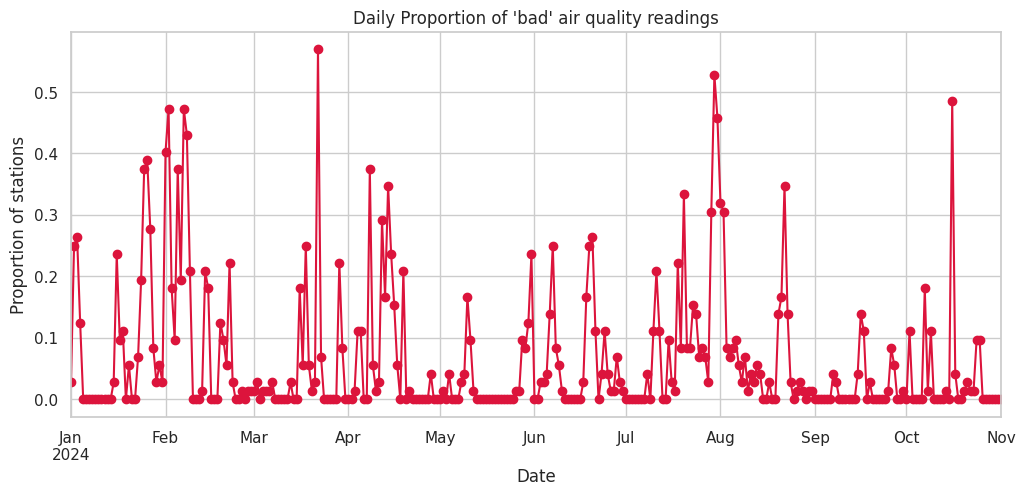

In [243]:
# proportion of "bad" labels per day
df['date'] = pd.to_datetime(df['date'])
daily_bad = (
    df.melt(id_vars='date', value_vars=pollution_cols, var_name='station', value_name='quality')
    .assign(is_bad=lambda x: x['quality'] == 'bad')
    .groupby('date')['is_bad']
    .mean()
)
print(daily_bad.head())


daily_bad.plot(figsize=(12,5), marker='o', color='crimson')
plt.title("Daily Proportion of 'bad' air quality readings")
plt.ylabel("Proportion of stations")
plt.xlabel("Date")
plt.show()

We can see here that pollution spikes are quite frequent.

### Relationship between traffic and air quality

This is similar to the previous EDA for regression,
so the following code was written by Claude Sonnet 4.5 and was left almost untouched

EXPLORATORY DATA ANALYSIS: Air Quality vs Traffic Correlation

### Dataset Shape ###
Rows: 7321, Columns: 27

### Traffic Zones Columns ###
['traffic_z0', 'traffic_z1', 'traffic_z3', 'traffic_z4', 'traffic_z5', 'traffic_z6', 'traffic_z7', 'traffic_z8']
True

### Air Quality Station Columns (PM10) ###
['station_4', 'station_43', 'station_54']
['station_4', 'station_43', 'station_54']
True

### Creating Average Traffic Variable ###
Average Traffic - Mean: 2.35, Std: 0.59

### Air Quality Distribution by Station ###

station_4:
station_4
bad        604
good      3957
medium    2760
Name: count, dtype: int64
Missing values: 0

station_43:
station_43
bad        561
good      4095
medium    2665
Name: count, dtype: int64
Missing values: 0

station_54:
station_54
bad        304
good      4481
medium    2536
Name: count, dtype: int64
Missing values: 0

### Average Traffic by Air Quality Class ###

station_4:
               mean    median       std  count
station_4                              

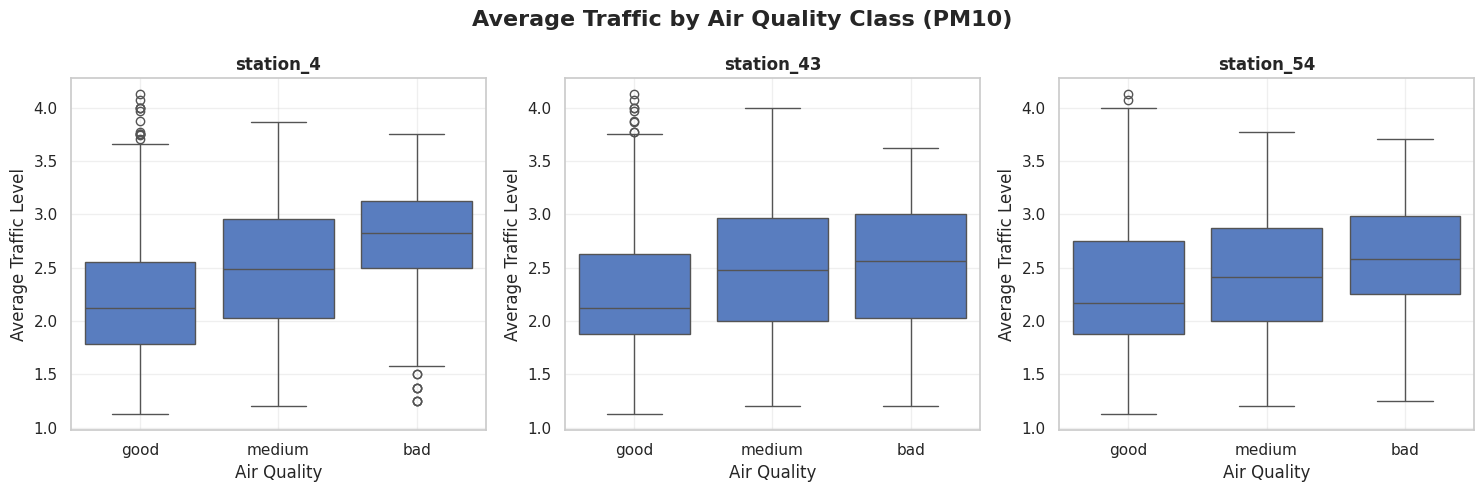

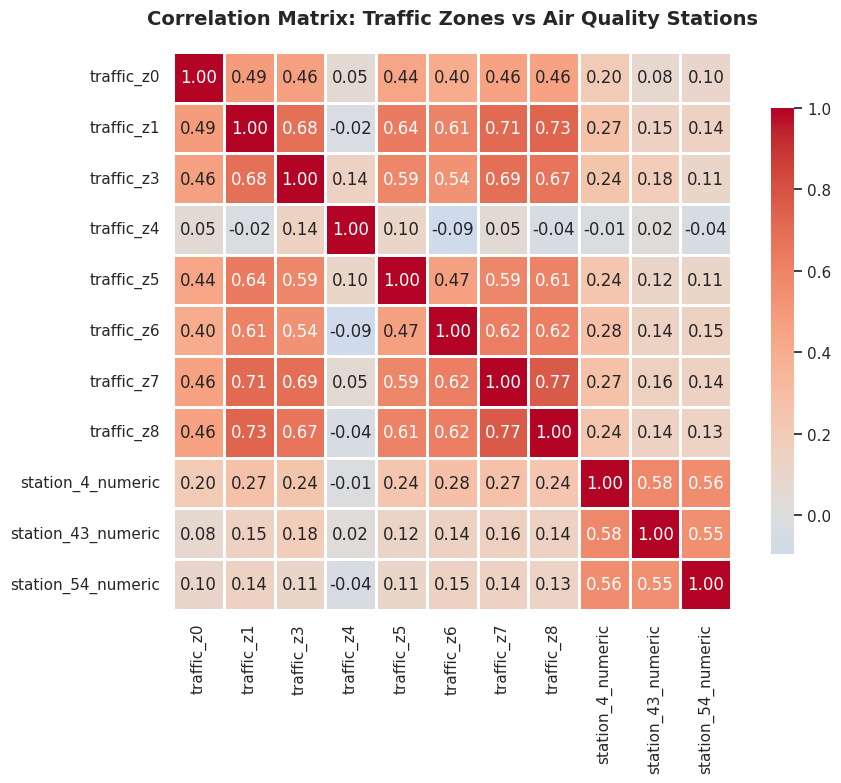

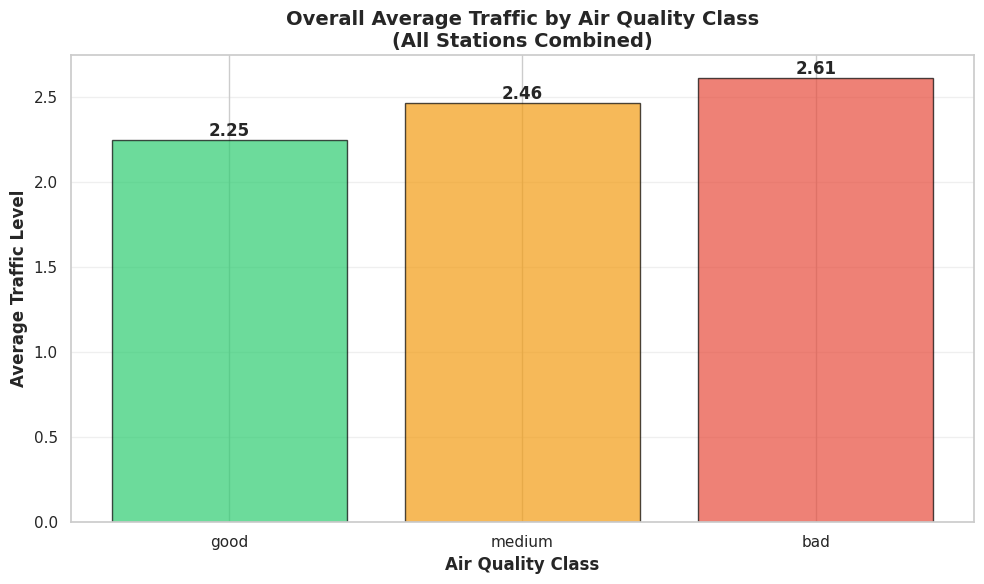

In [244]:
from scipy import stats


print("="*80)
print("EXPLORATORY DATA ANALYSIS: Air Quality vs Traffic Correlation")
print("="*80)

# ============================================================================
# 1. DATA OVERVIEW
# ============================================================================
print("\n### Dataset Shape ###")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n### Traffic Zones Columns ###")
traffic_cols2 = ['traffic_z0', 'traffic_z1', 'traffic_z3', 'traffic_z4', 
                'traffic_z5', 'traffic_z6', 'traffic_z7', 'traffic_z8']
print(traffic_cols2)
print(traffic_cols == traffic_cols2)

print("\n### Air Quality Station Columns (PM10) ###")
station_cols = pollution_cols
print(station_cols)
print(pollution_cols)
print(station_cols == pollution_cols)

# ============================================================================
# 2. CALCULATE AVERAGE TRAFFIC PER OBSERVATION
# ============================================================================
print("\n" + "="*80)
print("### Creating Average Traffic Variable ###")
df['avg_traffic'] = df[traffic_cols].mean(axis=1)
print(f"Average Traffic - Mean: {df['avg_traffic'].mean():.2f}, Std: {df['avg_traffic'].std():.2f}")

# ============================================================================
# 3. AIR QUALITY DISTRIBUTION
# ============================================================================
print("\n" + "="*80)
print("### Air Quality Distribution by Station ###")
for station in station_cols:
    print(f"\n{station}:")
    print(df[station].value_counts().sort_index())
    print(f"Missing values: {df[station].isna().sum()}")

# ============================================================================
# 4. TRAFFIC vs AIR QUALITY: DESCRIPTIVE STATISTICS
# ============================================================================
print("\n" + "="*80)
print("### Average Traffic by Air Quality Class ###")

quality_traffic_stats = []

for station in station_cols:
    print(f"\n{station}:")
    grouped = df.groupby(station)['avg_traffic'].agg(['mean', 'median', 'std', 'count'])
    print(grouped)
    
    # Store for overall analysis
    for quality_class in ['good', 'medium', 'bad']:
        mask = df[station] == quality_class
        if mask.sum() > 0:
            quality_traffic_stats.append({
                'station': station,
                'quality': quality_class,
                'avg_traffic': df.loc[mask, 'avg_traffic'].mean()
            })

# Overall statistics across all stations
print("\n### Overall Average Traffic by Quality (All Stations Combined) ###")
quality_df = pd.DataFrame(quality_traffic_stats)
overall_stats = quality_df.groupby('quality')['avg_traffic'].agg(['mean', 'median', 'count'])
print(overall_stats)

# ============================================================================
# 5. STATISTICAL TESTS: ANOVA
# ============================================================================
print("\n" + "="*80)
print("### Statistical Significance Testing (ANOVA) ###")

for station in station_cols:
    station_data = df[[station, 'avg_traffic']].dropna()
    
    if len(station_data[station].unique()) >= 2:
        groups = [group['avg_traffic'].values for name, group in station_data.groupby(station)]
        
        if len(groups) >= 2 and all(len(g) > 0 for g in groups):
            f_stat, p_value = stats.f_oneway(*groups)
            print(f"\n{station}:")
            print(f"  F-statistic: {f_stat:.4f}")
            print(f"  P-value: {p_value:.4f}")
            print(f"  Significant: {'YES' if p_value < 0.05 else 'NO'} (α=0.05)")

# ============================================================================
# 6. CORRELATION ANALYSIS: ENCODE QUALITY AS NUMERIC
# ============================================================================
print("\n" + "="*80)
print("### Correlation Analysis (Quality Encoded as Numeric) ###")
print("Encoding: good=1, medium=2, bad=3")

quality_mapping = {'good': 1, 'medium': 2, 'bad': 3}

for station in station_cols:
    df[f'{station}_numeric'] = df[station].map(quality_mapping)

numeric_station_cols = [f'{col}_numeric' for col in station_cols]

print("\nCorrelation with Average Traffic:")
correlations = df[['avg_traffic'] + numeric_station_cols].corr()['avg_traffic'][numeric_station_cols]
print(correlations.sort_values(ascending=False))

# ============================================================================
# 7. ZONE-SPECIFIC ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("### Correlation: Individual Traffic Zones vs Air Quality ###")

for station in station_cols:
    print(f"\n{station}:")
    zone_corrs = []
    for zone in traffic_cols:
        corr = df[[zone, f'{station}_numeric']].corr().iloc[0, 1]
        zone_corrs.append({'zone': zone, 'correlation': corr})
    
    zone_corr_df = pd.DataFrame(zone_corrs).sort_values('correlation', ascending=False)
    print(zone_corr_df.to_string(index=False))

# ============================================================================
# 8. VISUALIZATION CODE
# ============================================================================
print("\n" + "="*80)
print("### Generating Visualizations ###")

# Figure 1: Average Traffic by Quality Class
fig, axes = plt.subplots(1, len(station_cols), figsize=(15, 5))
fig.suptitle('Average Traffic by Air Quality Class (PM10)', fontsize=16, fontweight='bold')

for idx, station in enumerate(station_cols):
    ax = axes[idx]
    
    station_data = df[[station, 'avg_traffic']].dropna()
    
    if len(station_data) > 0:
        order = ['good', 'medium', 'bad']
        sns.boxplot(data=station_data, x=station, y='avg_traffic', order=order, ax=ax)
        ax.set_title(f'{station}', fontweight='bold')
        ax.set_xlabel('Air Quality')
        ax.set_ylabel('Average Traffic Level')
        ax.grid(True, alpha=0.3)

# Remove extra subplot

plt.tight_layout()
plt.savefig('traffic_quality_boxplots.png', dpi=300, bbox_inches='tight')
print("✓ Saved: traffic_quality_boxplots.png")

# Figure 2: Correlation Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix = df[traffic_cols + numeric_station_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix: Traffic Zones vs Air Quality Stations', 
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('traffic_quality_correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Saved: traffic_quality_correlation_heatmap.png")

# Figure 3: Overall comparison
fig, ax = plt.subplots(figsize=(10, 6))
overall_stats_plot = quality_df.groupby('quality')['avg_traffic'].mean().reindex(['good', 'medium', 'bad'])
bars = ax.bar(overall_stats_plot.index, overall_stats_plot.values, 
              color=['#2ecc71', '#f39c12', '#e74c3c'], alpha=0.7, edgecolor='black')
ax.set_xlabel('Air Quality Class', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Traffic Level', fontsize=12, fontweight='bold')
ax.set_title('Overall Average Traffic by Air Quality Class\n(All Stations Combined)', 
             fontsize=14, fontweight='bold')
ax.grid(True, axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('overall_traffic_by_quality.png', dpi=300, bbox_inches='tight')
print("✓ Saved: overall_traffic_by_quality.png")

print("\n" + "="*80)
print("### ANALYSIS COMPLETE ###")
print("="*80)

The main point from these three plots is the confirmation of the correlation between road traffic and air pollution.

In the first figure, we see that for every station, the poorer the quality, the higher the average traffic density.

In the correlation matrix (second plot), we can observe that all the traffic zones are correlated together. The same goes for the air quality stations that are correlated one with another. What is more interesting is the slight correlation between measured quality as number (higher=poorer air quality) and traffic in any zone. The exception of traffic_z4 may be the following: With the grid of size 3x3, the zone number 4 is in the center of the city (see the plot in `dataset_creation.ipynb`), we can imagine that there is always dense traffic (especially since this area has most of the sensors in the city center and that I take the 85th percentile). Hence the correlation being close to zero woud make sense as the correlation to anything with a constant is zero.

The third figure is just an average of the plots from the first one.

The difference between the traffic density values for different air quality may seem small, but it is important to remember of these traffic values were extracted from the city's data: Road sensors are distributed unevenly across the city, so I decided to divide the city in cells and to take the 85th percentile of every cell (to give more weight to the sensors detecting dense traffic). But it is clear that a better metric would be the number of thermal vehicles per square meter.

### Applying changes

The changes are just the same as for the regression dataset, except that here I also remove station 58.

In [ ]:
df = pd.read_pickle("created_dataset_classes.pkl") # Reload the dataset because the EDA made changes to the dataset
df=df.drop(['station_57', 'station_44', 'station_58'], axis=1)
df.to_pickle("final_dataset_classes.pkl")